##### Operator

In [ ]:
import operator

# 1. Basic Arithmetic
print(f"Addition: {operator.add(10, 5)}")
print(f"Multiplication: {operator.mul(10, 5)}")

# 2. itemgetter: Extracting values from sequences or mappings
# Often used for sorting lists of dictionaries or tuples
inventory = [("apple", 5), ("orange", 2), ("banana", 8)]
# Sort by the second element (index 1) of each tuple
sorted_inventory = sorted(inventory, key=operator.itemgetter(1))
print(f"Sorted by count: {sorted_inventory}")

# 3. attrgetter: Extracting attributes from objects
class Product:
    def __init__(self, name, price):
        self.name = name
        self.price = price

products = [Product("Laptop", 1200), Product("Mouse", 25)]
# Get all prices from the list of objects
prices = list(map(operator.attrgetter("price"), products))
print(f"Prices: {prices}")

# 4. methodcaller: Calling a method on every object in an iterable
text_list = ["   hello ", " world  ", "python   "]
# Call the .strip() method on each string
cleaned = list(map(operator.methodcaller("strip"), text_list))
print(f"Cleaned: {cleaned}")




Addition: 15
Multiplication: 50
Sorted by count: [('apple', 5), ('banana', 8), ('orange', 2)]
Prices: [1200, 25]
Cleaned: ['hello', 'world', 'python']


##### Without dataclass

In [9]:
class Inventory:
    quantity: int
    unit_price: int

    def total_cost(self):
        return self.quantity * self.unit_price


inventory = Inventory()
inventory.quantity = 10
inventory.unit_price = 100

print(inventory.total_cost())

print(inventory)

1000


##### With dataclass

In [16]:
from dataclasses import dataclass

@dataclass
class Inventory:
    quantity: int = 10
    unit_price: int = 100

    def total_cost(self):
        return self.quantity * self.unit_price

inventory_1 = Inventory(quantity=20, unit_price=100)

print(inventory_1.total_cost())
print(inventory_1)

2000
Inventory(quantity=20, unit_price=100)


##### Class Method Example

In [ ]:
class Employee:
    company_name = "Tech Corp"

    def __init__(self, name, salary):
        self.name = name
        self.salary = salary

    @classmethod
    def update_company_name(cls, new_name):
        """Class method to modify a class-level attribute."""
        cls.company_name = new_name

    @classmethod
    def from_string(cls, employee_str):
        """Class method used as an alternative constructor."""
        name, salary = employee_str.split("-")
        return cls(name, int(salary))

# Example usage
emp1 = Employee.from_string("John-50000")
Employee.update_company_name("Innovate Ltd")

print(f"{emp1.name} works at {Employee.company_name}")


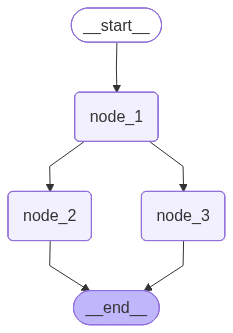

In [3]:
from pydantic import BaseModel, field_validator, ValidationError
from langgraph.graph import StateGraph, START, END
from typing import Optional, Literal
from IPython.display import display, Image

class State(BaseModel):
    name: str
    mood: str

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        if value not in ['happy', 'sad']:
            raise ValueError("Mood should be 'happy' or 'sad'")
        return value

builder = StateGraph(State)

def node_1(state):
    return {"name": f"{state.name} is "}

def node_2(state):
    return {"mood": 'happy'}

def node_3(state):
    return {"mood": 'sad'}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    ran = random.random()
    if ran <= 0.5:
        return "happy"
    else:
        return "sad"

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()

# res = graph.invoke(State(name="Praveen", mood="happy"))
# print(res)

display(Image(graph.get_graph().draw_mermaid_png()))